# Montar Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Instalar Gromacs y check

In [1]:
!sudo apt-get update
!sudo apt-get install gromacs
!gmx --version


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,240 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 https://r2u.stat.i

### Crear directorio de Trabajo : minimization

In [3]:
#Let's make a folder first. We need to import the os and path library
import os
from pathlib import Path

#Then, we define the path of the folder we want to create.
#Notice that the HOME folder for a hosted runtime in colab is /content/
minipath = Path("/content/minimization/")

#Now, we create the folder using the os.mkdir() command
#The if conditional is just to check whether the folder already exists
#In which case, python returns an error
if os.path.exists(minipath):
  print("path already exists")
if not os.path.exists(minipath):
  os.mkdir(minipath)
  print("path was succesfully created")

path was succesfully created


In [4]:
#set the working directory
os.chdir(minipath)

In [5]:
#Swith to %%bash
%%bash
#where I am?
pwd

/content/minimization


In [6]:
#Installing py3Dmol using pip
!pip install py3Dmol
#Installing biopython using pip
!pip install biopython
#Importing py3Dmol for safety
import py3Dmol
# if you have conda try: conda install -c conda-forge biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.1 MB/s eta 0:00:00


# Subir las estructuras


In [7]:
!cp /content/drive/MyDrive/Thesis_Documents/Thesis_IV/SBM/O_Mad2.pdb /content/minimization/
!cp /content/drive/MyDrive/Thesis_Documents/Thesis_IV/SBM/C_Mad2.pdb /content/minimization/

# Contar si es que tienen la misma cantidad de atomos

In [9]:
%%bash
# Filtrar solo las líneas ATOM y HETATM de los archivos .pdb
awk '/^(ATOM|HETATM)/ {print $0}' C_Mad2.pdb > file1_atoms.txt
awk '/^(ATOM|HETATM)/ {print $0}' O_Mad2.pdb > file2_atoms.txt

# Comparar los archivos de átomos
awk 'NR==FNR {a[$0]++; next} {if (!($0 in a)) print "In O_Mad2.pdb but not in C_Mad2.pdb:", $0}' file1_atoms.txt file2_atoms.txt
awk 'NR==FNR {a[$0]++; next} {if (!($0 in a)) print "In C_Mad2.pdb but not in O_Mad2.pdb:", $0}' file2_atoms.txt file1_atoms.txt

# Contar la cantidad de átomos en cada archivo
echo "Total átomos en C_Mad2.pdb:"
wc -l file1_atoms.txt

echo "Total átomos en O_Mad2.pdb:"
wc -l file2_atoms.txt




In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      1  N   MET A   1     -14.413   8.456 -19.032  1.00  0.00           N
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      2  CA  MET A   1     -15.110   9.455 -18.189  1.00  0.00           C
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      3  C   MET A   1     -16.593   9.368 -18.368  1.00  0.00           C
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      4  O   MET A   1     -17.114   9.599 -19.456  1.00  0.00           O
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      5  CB  MET A   1     -14.636  10.871 -18.512  1.00  0.00           C
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      6  CG  MET A   1     -15.261  11.957 -17.648  1.00  0.00           C
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      7  SD  MET A   1     -14.793  11.819 -15.912  1.00  0.00           S
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      8  CE  MET A   1     -13.060  12.263 -15.992  1.00  0.00           C
In O_Mad2.pdb but not in C_Mad2.pdb: ATOM      9  N   ALA A   2     -17.

# Visualization

In [16]:
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#First we assign the py3Dmol.view as a two-panel viewer
view=py3Dmol.view(800,800)
#The following lines are used to add the addModel class
#to read the PDB files
view.addModel(open('/content/minimization/O_Mad2.pdb', 'r').read(),'pdb')
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style and color
view.setStyle({'chain':'A'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'B'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'G'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'H'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'I'},{'cartoon': {'color':'spectrum'}})

#Centering view on all visible atoms
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#First we assign the py3Dmol.view as a two-panel viewer
view=py3Dmol.view(800,800)
#The following lines are used to add the addModel class
#to read the PDB files
view.addModel(open('/content/minimization/C_Mad2.pdb', 'r').read(),'pdb')
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style and color
view.setStyle({'chain':'A'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'B'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'G'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'H'},{'cartoon': {'color':'spectrum'}})
#view.setStyle({'chain':'I'},{'cartoon': {'color':'spectrum'}})

#Centering view on all visible atoms
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# New parametrization mode


In [10]:
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/files/em.mdp
!wget https://raw.githubusercontent.com/pb3lab/ibm3202/master/files/ions.mdp
!source /content/gromacs/bin/GMXRC


--2024-08-27 03:33:37--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/files/em.mdp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1167 (1.1K) [text/plain]
Saving to: ‘em.mdp’

em.mdp              100%[===================>]   1.14K  --.-KB/s    in 0s      

2024-08-27 03:33:37 (28.4 MB/s) - ‘em.mdp’ saved [1167/1167]

--2024-08-27 03:33:37--  https://raw.githubusercontent.com/pb3lab/ibm3202/master/files/ions.mdp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 966 [text/plain]
Saving to: ‘ions.mdp’

ions.mdp            1

# Modificar  ions.mdp

With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20

PME for electrostatic

In [11]:
#Check the content of the MDP file
!paste ions.mdp

; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 10        ; Frequency to update the neighbor list and long range forces
cutoff-scheme	= Verlet    ; Buffered neighbor searching 
coulombtype     = cutoff    ; Treatment of long range electrostatic interactions
rcoulomb        = 1.2       ; Short-range electrostatic cut-off
rvdw            = 1.2       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions


#Modificar el em.mdp
(nstlim >=20 for GPU ) y revisar

In [12]:
#Check the content of the MDP file
!paste em.mdp

; em.mdp - used as input into grompp to generate em.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.001         ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
rcoulomb        = 1.2       ; Short-range electrostatic cut-off
rvdw            = 1.2       ; Short-range Van der Waals cut-off
pbc             = xyz       ; Periodic Boundary Conditions in all 3 dimensions

; Electrostatics
coulombtype     = PME       ; Particle Mesh Ewald for long-range electrostatics
pme_order       = 4 

In [37]:
%%writefile minimization.sh

#!/bin/bash

# Nombre del archivo PDB
PDB_FILE="O_Mad2.pdb"

# Verificar si el archivo PDB existe
if [ ! -f $PDB_FILE ]; then
    echo "El archivo $PDB_FILE no existe."
    exit 1
fi

# Usar pdb2gmx para parametrizar el PDB con el campo de fuerza AMBER y agua SPC/E
gmx pdb2gmx -f $PDB_FILE -o O_Mad2_processed.gro -water spce -ignh -ff amber99sb-ildn -ter

# Verificar si pdb2gmx fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en pdb2gmx."
    exit 1
fi

# Definir la caja de simulación con una distancia de 1.5 nm y forma octaédrica
gmx editconf -f O_Mad2_processed.gro -o O_Mad2_newbox.gro -c -d 1.5 -bt octahedron

# Verificar si editconf fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en editconf."
    exit 1
fi

# Solvatar el sistema con agua
gmx solvate -cp O_Mad2_newbox.gro -o O_Mad2_newbox_solv.gro -p topol.top

# Verificar si solvate fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en solvate."
    exit 1
fi

# Usar grompp y un archivo de instrucciones MD para añadir contraiones al sistema
gmx grompp -f ions.mdp -c O_Mad2_newbox_solv.gro -p topol.top -o ions.tpr -maxwarn 1

# Verificar si grompp fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en grompp para ionización."
    exit 1
fi

# Crear un archivo de opciones para reemplazar agua por iones
echo "SOL" > options
echo " " >> options

# Usar genion para añadir contraiones al sistema solvado
gmx genion -s ions.tpr -o O_Mad2_newbox_solv_ions.gro -p topol.top -pname NA -nname CL -neutral < options

# Verificar si genion fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en genion."
    exit 1
fi

# Generar el archivo .tpr para la minimización
gmx grompp -f em.mdp -c O_Mad2_newbox_solv_ions.gro -p topol.top -o em.tpr

# Verificar si grompp para minimización fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en grompp para minimización."
    exit 1
fi

# Ejecutar la minimización de energía (modo CPU)
gmx mdrun -v -deffnm em

# Verificar si mdrun fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en mdrun."
    exit 1
fi

# Revisar el resultado de la minimización
gmx energy -f em.edr -o em_potential.xvg <<EOF
10
EOF

# Verificar si gmx energy fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en la extracción de energía."
    exit 1
fi

# Crear el archivo de índice para seleccionar átomos de proteína, solvente e iones
gmx make_ndx -f O_Mad2_newbox_solv_ions.gro -o index.ndx <<EOF
r SOL
r NA | r CL
q
EOF

# Usar trjconv para extraer solo átomos de la proteína y eliminar solvente e iones

gmx trjconv -s em.tpr -f em.trr -o em_protein_only.pdb -n index.ndx

# Verificar si trjconv fue exitoso
if [ $? -ne 0 ]; then
    echo "Error en trjconv."
    exit 1
fi

# Imprimir el contenido de em_potential.xvg
echo "Contenido de em_potential.xvg:"
cat em_potential.xvg

echo "Minimización completada. Revisa el archivo em_potential.xvg para ver la energía potencial y em_protein_only.pdb para la estructura sin solvente e iones."




Overwriting minimization.sh


In [35]:
!chmod +x minimization.sh
!./minimization.sh

             :-) GROMACS - gmx pdb2gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

# Ver como la energia se va haciendo mas negativa hasta que Fmax < 1000

In [40]:
!gmx trjconv -s em.tpr -f em.trr -o em_water_only.pdb -n index.ndx

             :-) GROMACS - gmx trjconv, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

In [41]:
#!grep "qtot" topol.top

In [19]:
# borrar primeras 24 lineas de em_potental.xvg usando awk
!awk 'NR>24' em_potential.xvg > em_potential_new.xvg

<ipython-input-20-fb9dc81dd8a6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


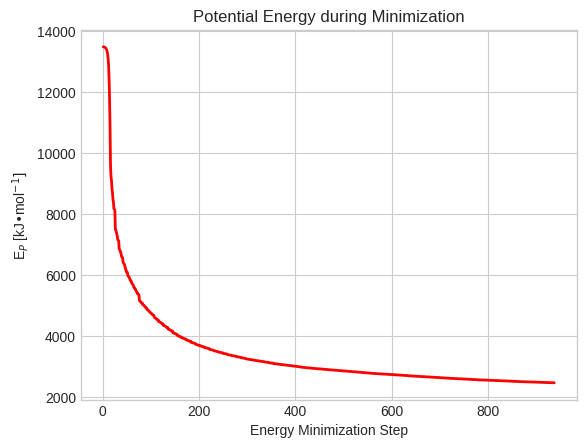

In [20]:
#Plotting the potential energy of the system
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

#Reading the text file containing this information
data = np.loadtxt('/content/minimization/em_potential_new.xvg', skiprows=1)

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2', color='red')
plt.show()

In [ ]:
os.chdir("/content/")
!zip -r minimization.zip $minipath
from google.colab import files
files.download("/content/minimization.zip")

  adding: content/minimization/ (stored 0%)
  adding: content/minimization/em.log (deflated 90%)
  adding: content/minimization/#topol.top.1# (deflated 60%)
  adding: content/minimization/complex_newbox.pdb (deflated 78%)
  adding: content/minimization/posre_Protein_chain_F.itp (deflated 91%)
  adding: content/minimization/topol_Ion_chain_F2.itp (deflated 47%)
  adding: content/minimization/mdout.mdp (deflated 63%)
  adding: content/minimization/posre_Protein_chain_E.itp (deflated 91%)
  adding: content/minimization/posre_Protein_chain_H.itp (deflated 91%)
  adding: content/minimization/topol_Protein_chain_D.itp (deflated 86%)
  adding: content/minimization/topol_Protein_chain_G.itp (deflated 85%)
  adding: content/minimization/#topol.top.2# (deflated 60%)
  adding: content/minimization/options (stored 0%)
  adding: content/minimization/posre_RNA_chain_I.itp (deflated 89%)
  adding: content/minimization/em.mdp (deflated 51%)
  adding: content/minimization/em.trr (deflated 12%)
  adding

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>